In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
import copy
%matplotlib inline

### Load data from csv for train and test

In [2]:
data = pd.read_csv('train.csv')
orig_data = copy.deepcopy(data)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Drop ID column, it's useless for us

In [5]:
data = data.drop(columns=['Id'])

In [6]:
# MSSubClass is categorial, so let's make it string

data['MSSubClass'] = data['MSSubClass'].astype('str')

In [7]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)
cat_feat

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('Not in list')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not in list,Reg,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not in list,Reg,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not in list,IR1,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not in list,IR1,Lvl,AllPub,Corner,...,0,Not in list,Not in list,Not in list,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not in list,IR1,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,12,2008,WD,Normal,250000


In [9]:
#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = data[cat_feat].nunique()
print(cat_nunique)

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64


In [10]:
# Создаем дамми-переменные для категорий
dummy = pd.get_dummies(data[cat_feat], columns=cat_feat)
dummy

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Заменяем пропуски на специальное значение 0.0, чтобы деревья могли их отличить
data = pd.concat([data[num_feat].fillna(0.0), dummy], axis=1)
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Thanks to Daniil for explain, use "corr()" function to find correlations

In [12]:
data.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,-0.011881,0.183706,0.001366,-0.139867,-0.008876,-0.004724,-0.009519,0.028489,-0.134115,0.184103
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.004724,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,-0.015130,-0.034618,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009519,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,-0.026277,-0.059130,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.028489,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,-0.007929,0.021534,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,-0.134115,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,0.041207,-0.153930,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


### Let's find correlation between columns

In [13]:
corr_data = data.corr()
for column_name, row in corr_data.iterrows():
    for row_name, value in dict(row).items():
        if row_name != column_name and 0.97 < abs(value) < 1.0:
            print(f'Column "{column_name}" with Row "{row_name}": {abs(value)}')


Column "GarageYrBlt" with Row "GarageType_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageFinish_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageQual_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageCond_Not in list": 0.99860051564718
Column "PoolArea" with Row "PoolQC_Not in list": 0.9896653207254367
Column "MSSubClass_190" with Row "BldgType_2fmCon": 0.9833947289220359
Column "BldgType_2fmCon" with Row "MSSubClass_190": 0.9833947289220359
Column "Exterior1st_CemntBd" with Row "Exterior2nd_CmentBd": 0.9741710841939724
Column "Exterior1st_MetalSd" with Row "Exterior2nd_MetalSd": 0.9730651937625319
Column "Exterior1st_VinylSd" with Row "Exterior2nd_VinylSd": 0.9775248873036357
Column "Exterior2nd_CmentBd" with Row "Exterior1st_CemntBd": 0.9741710841939724
Column "Exterior2nd_MetalSd" with Row "Exterior1st_MetalSd": 0.9730651937625319
Column "Exterior2nd_VinylSd" with Row "Exterior1st_VinylSd": 0.9775248873036357
Column "BsmtQual

### Let's view columns with most corr to SalePrice

In [14]:
corr_price = data.corr()['SalePrice'].sort_values(ascending=False)
print(abs(corr_price).head(5))

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


### Split data to train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['SalePrice']), data['SalePrice'], test_size=0.3)

In [16]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,50.0,6000,6,6,1939,1950,0.0,0,0,780,...,0,0,0,1,0,0,0,0,1,0
1311,68.0,8814,7,5,2005,2007,80.0,925,0,349,...,0,1,0,0,0,0,0,0,0,1
1384,60.0,9060,6,5,1939,1950,0.0,204,0,356,...,0,0,0,1,0,0,0,0,1,0
354,60.0,8400,6,5,1940,2000,0.0,388,0,552,...,0,0,0,1,0,0,0,0,1,0
126,0.0,4928,6,5,1976,1976,0.0,120,0,958,...,0,0,0,1,0,0,0,0,1,0


In [17]:
y_train.head()

1285    132500
1311    203000
1384    105000
354     140000
126     128000
Name: SalePrice, dtype: int64

In [18]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,50.0,6000,6,6,1939,1950,0.0,0,0,780,...,0,0,0,1,0,0,0,0,1,0
1311,68.0,8814,7,5,2005,2007,80.0,925,0,349,...,0,1,0,0,0,0,0,0,0,1
1384,60.0,9060,6,5,1939,1950,0.0,204,0,356,...,0,0,0,1,0,0,0,0,1,0
354,60.0,8400,6,5,1940,2000,0.0,388,0,552,...,0,0,0,1,0,0,0,0,1,0
126,0.0,4928,6,5,1976,1976,0.0,120,0,958,...,0,0,0,1,0,0,0,0,1,0


In [19]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
180,0.0,2117,6,5,2000,2000,456.0,436,0,320,...,0,0,0,1,0,0,0,0,1,0
311,50.0,8000,6,6,1948,2002,0.0,680,0,292,...,0,0,0,1,0,0,0,0,1,0
555,58.0,6380,5,6,1922,1950,0.0,0,0,993,...,0,0,0,1,0,0,0,0,1,0
203,0.0,4438,6,5,2004,2004,205.0,662,0,186,...,0,0,0,1,0,0,0,0,1,0
15,51.0,6120,7,8,1929,2001,0.0,0,0,832,...,0,0,0,1,0,0,0,0,1,0


In [20]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,57.479452,10446.044031,6.092955,5.610568,1970.300391,1984.532290,97.914873,437.317025,40.475538,574.646771,...,0.001957,0.082192,0.001957,0.859100,0.071429,0.002935,0.007828,0.011742,0.820939,0.085127
std,35.632594,10361.586084,1.385587,1.140049,30.712703,20.821202,182.848807,466.481748,152.212700,439.957666,...,0.044216,0.274791,0.044216,0.348089,0.257665,0.054126,0.088171,0.107774,0.383591,0.279208
min,0.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,7409.000000,5.000000,5.000000,1951.000000,1966.000000,0.000000,0.000000,0.000000,234.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,62.000000,9345.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,368.500000,0.000000,490.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11612.000000,7.000000,6.000000,2000.000000,2004.000000,144.000000,704.750000,0.000000,816.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_types = X_train.dtypes
data_types.groupby(data_types).count()

uint8      283
int64       32
float64      3
dtype: int64

### Create forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf_rf1 = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=10, max_features=1, n_jobs=-1)
clf_rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=10,
                       n_estimators=20, n_jobs=-1)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

def mse_score(model, etalon=None, x_train=X_train, x_test=X_test, no_limits=False):
    my_pred_train_data = model.predict(x_train)
    my_pred_test_data = model.predict(x_test)
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    ax[0].scatter(y_train, my_pred_train_data)
    if no_limits:
        ax[0].plot()
    else:
        ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
    ax[0].set_xlabel('Y_Train')
    ax[0].set_ylabel('Train Predicted')
    
    ax[1].scatter(y_test, my_pred_test_data)
    if no_limits:
        ax[1].plot()
    else:
        ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    ax[1].set_xlabel('Y_Test')
    ax[1].set_ylabel('Test Predicted')
    plt.show()
    
    print(f'--- Train: Pred.val: {my_pred_train_data[0]}  Orig.val: {y_train.iloc[0]}')
    print(f'--- Test: Pred.val: {my_pred_test_data[0]}  Orig.val: {y_test.iloc[0]}')
    
    mse_train = np.sqrt(mean_squared_error(y_train, my_pred_train_data)).mean()
    mse_test = np.sqrt(mean_squared_error(y_test, my_pred_test_data)).mean()
    
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    
    print(f'MSE Train: {mse_train}  MSE Test: {mse_test} ')
    print(f'Score Train: {score_train}  Score Test: {score_test}')
    if etalon is not None:
        print(f'Diff with etalon:')
        print(f'MSETrain: {etalon[0] - mse_train}  MSETest: {etalon[1] - mse_test} ')
        print(f'Score_train: {etalon[2] - score_train} Score_test: {etalon[3] - score_test}')
        
    return (mse_train,mse_test,score_test,score_train)


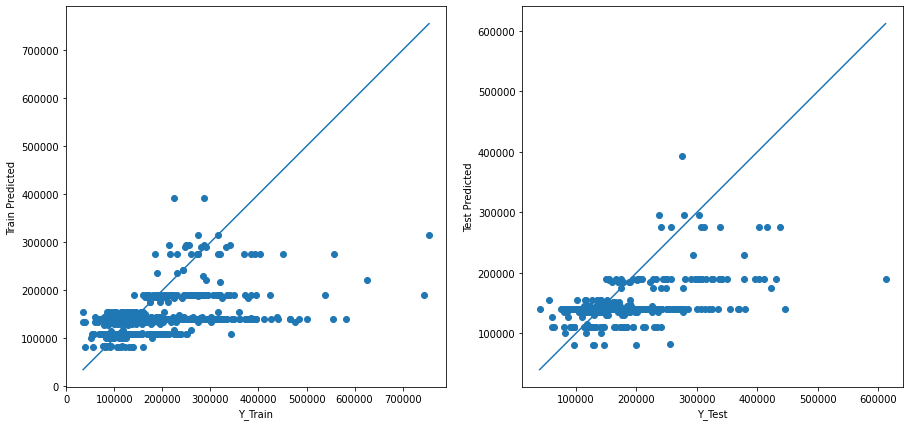

--- Train: Pred.val: 140000  Orig.val: 132500
--- Test: Pred.val: 140000  Orig.val: 177000
MSE Train: 80830.51391013493  MSE Test: 74256.4928333454 
Score Train: 0.05968688845401174  Score Test: 0.0091324200913242


In [24]:
etalon_score = mse_score(clf_rf1, None, X_train, X_test)

### Try to search best forest

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : list(range(2, 8)),
    'min_samples_leaf': [1,2,5,10]
}
CV_rfc = GridSearchCV(estimator=clf_rf1, param_grid=param_grid, verbose=5, cv=10)
_ = CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   2.6s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10

[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_esti

[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_esti

[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_esti

[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=10, n_est

[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=1

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_est

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_est

[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_est

[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimator

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_est

[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimato

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_est

[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.1s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimat

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_est

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 150}

### So, GridSearcgCV said: best params are - {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}

In [26]:
clf_rf = RandomForestClassifier(max_depth=6, max_features='auto', min_samples_leaf=10, n_estimators=100, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

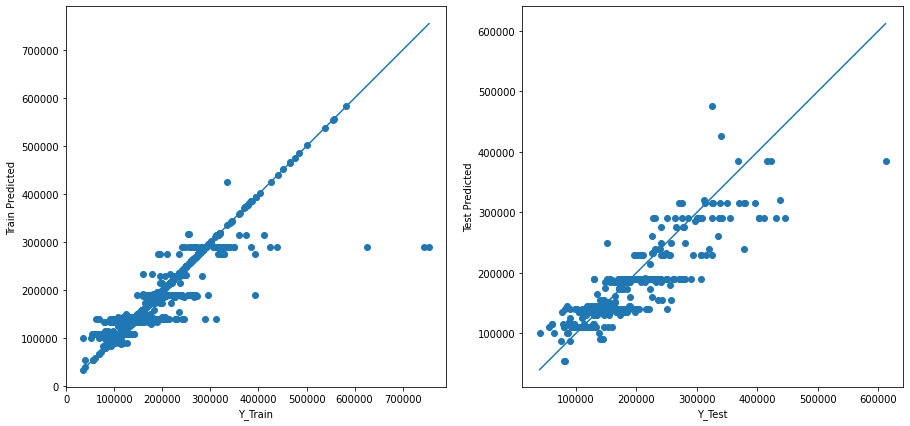

--- Train: Pred.val: 140000  Orig.val: 132500
--- Test: Pred.val: 172500  Orig.val: 177000
MSE Train: 33551.107662966024  MSE Test: 39070.05407174336 
Score Train: 0.4892367906066536  Score Test: 0.0091324200913242
Diff with etalon:
MSETrain: 47279.40624716891  MSETest: 35186.43876160204 
Score_train: -0.4801043705153294 Score_test: 0.05055446836268754


In [27]:
etalon_score = mse_score(clf_rf, etalon_score, X_train, X_test)

### Check features, make some plots to filter non-important

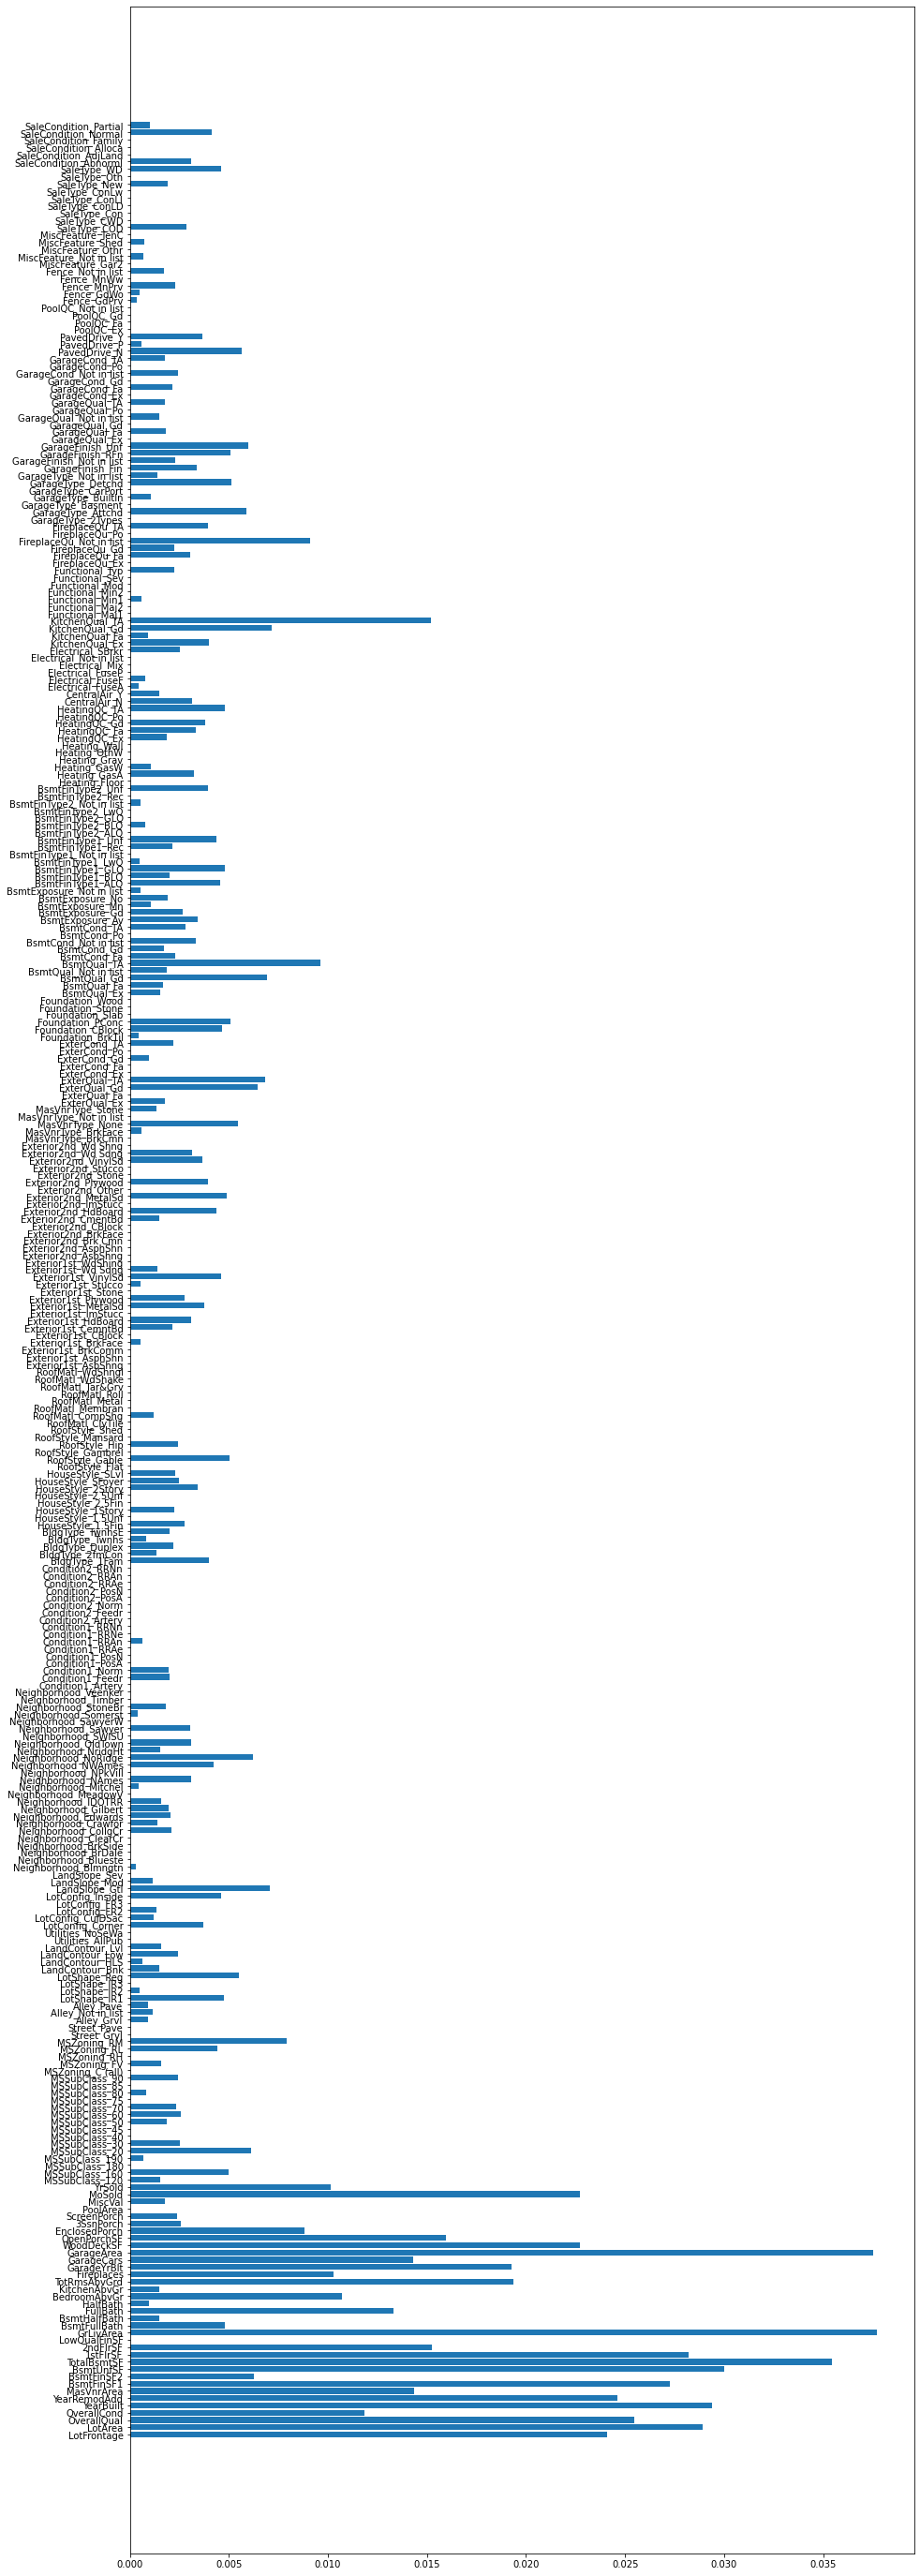

In [28]:
plt.figure(figsize=(15, 50))

features, columns = clf_rf.feature_importances_, X_train.columns

plt.barh(np.arange(len(features)), features)
_ = plt.yticks(np.arange(len(columns)), columns)

### Let's remove non-important features 

In [29]:
zipped = list(zip(clf_rf.feature_importances_, X_train.columns))
importants = [x for x in zipped if x[0] > 0.002]
unzipped = list(zip(*importants))
unzipped

[(0.024089643667388083,
  0.028905289026162646,
  0.02544415834459357,
  0.011842803587784511,
  0.029370450531454907,
  0.024603041154246563,
  0.0143480401097415,
  0.027265984487209304,
  0.006243503642701732,
  0.030009502636042892,
  0.0354351308398484,
  0.028207459501813675,
  0.015271920564401156,
  0.03770311320205276,
  0.004780324354511787,
  0.013287686004852382,
  0.010694397817421993,
  0.01935850899276784,
  0.010294075570706353,
  0.019274850813167883,
  0.014326272812295373,
  0.037543343734494715,
  0.02271394648611894,
  0.01596011935625245,
  0.008798036624572157,
  0.002590284647537418,
  0.0023852718494721285,
  0.022730462489727387,
  0.010134758670380571,
  0.0049732366575572125,
  0.006131425139911091,
  0.0025208774281937595,
  0.002581113805880176,
  0.0023519555536981283,
  0.0024234233695506363,
  0.004434893242702524,
  0.007937681430006087,
  0.0047647088510349685,
  0.005513573994839522,
  0.0024186557682503895,
  0.0037171248689283824,
  0.0045864692104

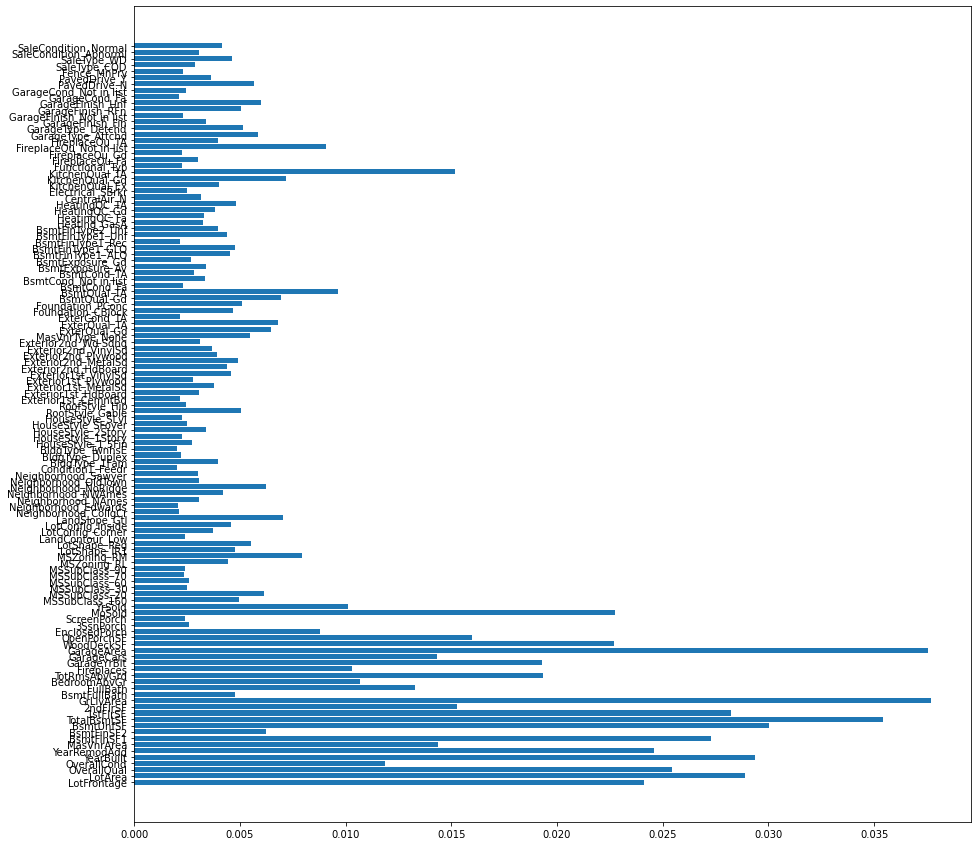

In [30]:
plt.figure(figsize=(15, 15))

important_features, important_columns = unzipped[0], unzipped[1]

plt.barh(np.arange(len(important_features)), important_features)
_ = plt.yticks(np.arange(len(important_columns)), important_columns)

In [31]:
len(important_columns)

118

### Let's try to use important features only

In [32]:
dropped_cols = [x for x in X_train if x not in important_columns]
dropped_cols

['LowQualFinSF',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'PoolArea',
 'MiscVal',
 'MSSubClass_120',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Not in list',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighb

In [33]:
X_train_important = X_train.drop(columns=dropped_cols)
X_train_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageFinish_Unf,GarageCond_Fa,GarageCond_Not in list,PavedDrive_N,PavedDrive_Y,Fence_MnPrv,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
1285,50.0,6000,6,6,1939,1950,0.0,0,0,780,...,1,0,0,0,1,0,0,1,0,1
1311,68.0,8814,7,5,2005,2007,80.0,925,0,349,...,0,0,0,0,1,0,0,0,0,0
1384,60.0,9060,6,5,1939,1950,0.0,204,0,356,...,1,0,0,0,0,1,0,1,0,1
354,60.0,8400,6,5,1940,2000,0.0,388,0,552,...,1,0,0,0,1,0,0,1,0,1
126,0.0,4928,6,5,1976,1976,0.0,120,0,958,...,0,0,0,0,1,0,0,1,0,1


In [34]:
X_test_important = X_test.drop(columns=dropped_cols)
X_test_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageFinish_Unf,GarageCond_Fa,GarageCond_Not in list,PavedDrive_N,PavedDrive_Y,Fence_MnPrv,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
180,0.0,2117,6,5,2000,2000,456.0,436,0,320,...,1,0,0,0,1,0,0,1,0,1
311,50.0,8000,6,6,1948,2002,0.0,680,0,292,...,1,0,0,0,1,0,0,1,0,1
555,58.0,6380,5,6,1922,1950,0.0,0,0,993,...,1,0,0,0,1,0,0,1,0,1
203,0.0,4438,6,5,2004,2004,205.0,662,0,186,...,0,0,0,0,1,0,0,1,0,1
15,51.0,6120,7,8,1929,2001,0.0,0,0,832,...,1,0,0,0,1,0,0,1,0,1


In [35]:
clf_rf.fit(X_train_important, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

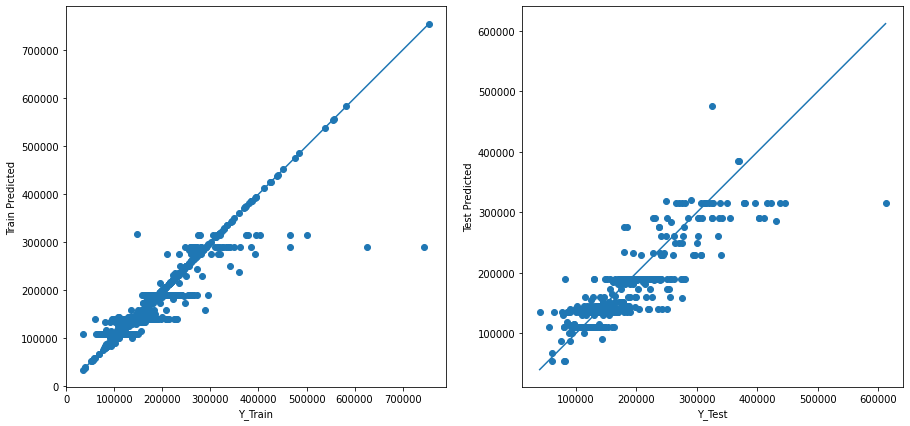

--- Train: Pred.val: 140000  Orig.val: 132500
--- Test: Pred.val: 151000  Orig.val: 177000
MSE Train: 28936.359826062537  MSE Test: 40187.99403920252 
Score Train: 0.5097847358121331  Score Test: 0.01141552511415525
Diff with etalon:
MSETrain: 4614.747836903487  MSETest: -1117.939967459155 
Score_train: -0.5006523157208089 Score_test: 0.47782126549249837


In [36]:
_ = mse_score(clf_rf, etalon_score, X_train_important, X_test_important)

### Let's add ensemble

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Prepare data

In [38]:
from sklearn.preprocessing import StandardScaler

X_train_ensemble = X_train.copy(deep=True)
X_test_ensemble = X_test.copy(deep=True)

In [39]:
if 'SalePrice' in num_feat: num_feat.remove('SalePrice')

In [40]:
train_median = X_train_ensemble[num_feat].median()

scaler = StandardScaler()
scaler.fit(X_train_ensemble[num_feat])

X_train_ensemble[num_feat] = scaler.transform(X_train_ensemble[num_feat])
X_test_ensemble[num_feat] = scaler.transform(X_test_ensemble[num_feat])

In [41]:
X_train_ensemble

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,-0.210008,-0.429299,-0.067120,0.341760,-1.019634,-1.659328,-0.535759,-0.937938,-0.266045,0.466985,...,0,0,0,1,0,0,0,0,1,0
1311,0.295395,-0.157586,0.654949,-0.535825,1.130366,1.079607,-0.098024,1.045961,-0.266045,-0.513134,...,0,1,0,0,0,0,0,0,0,1
1384,0.070772,-0.133833,-0.067120,-0.535825,-1.019634,-1.659328,-0.535759,-0.500408,-0.266045,-0.497216,...,0,0,0,1,0,0,0,0,1,0
354,0.070772,-0.197561,-0.067120,-0.535825,-0.987058,0.743246,-0.535759,-0.105773,-0.266045,-0.051500,...,0,0,0,1,0,0,0,0,1,0
126,-1.613904,-0.532809,-0.067120,-0.535825,0.185669,-0.409989,-0.535759,-0.680568,-0.266045,0.871768,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,-1.024268,-0.820068,-0.067120,-0.535825,0.087942,-0.554144,1.696686,-0.275209,-0.266045,-0.911094,...,0,0,0,1,0,0,0,0,1,0
1158,0.969266,0.143480,1.377018,-0.535825,1.195518,1.127658,0.481973,-0.937938,-0.266045,2.286232,...,0,0,0,0,0,0,0,0,0,1
650,0.211161,-0.224114,0.654949,0.341760,1.195518,1.079607,-0.535759,-0.937938,-0.266045,0.542029,...,0,0,0,1,0,0,0,0,1,0
75,-1.024268,-0.854539,-1.511258,-0.535825,0.087942,-0.554144,-0.535759,0.052939,-0.266045,-1.306781,...,0,0,0,1,0,0,0,0,1,0


In [42]:
X_train_ensemble.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,-3.302425e-17,6.257226e-17,5.214355e-18,-3.128613e-16,1.659903e-15,7.126285e-16,1.042871e-17,4.519107e-17,6.952473e-18,-6.778661e-17,...,0.001957,0.082192,0.001957,0.859100,0.071429,0.002935,0.007828,0.011742,0.820939,0.085127
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044216,0.274791,0.044216,0.348089,0.257665,0.054126,0.088171,0.107774,0.383591,0.279208
min,-1.613904e+00,-8.831198e-01,-3.677465e+00,-3.168579e+00,-3.202210e+00,-1.659328e+00,-5.357585e-01,-9.379384e-01,-2.660445e-01,-1.306781e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.837674e-01,-2.932496e-01,-7.891888e-01,-5.358247e-01,-6.287249e-01,-8.905040e-01,-5.357585e-01,-9.379384e-01,-2.660445e-01,-7.746508e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.269276e-01,-1.063141e-01,-6.711991e-02,-5.358247e-01,5.536604e-02,4.068860e-01,-5.357585e-01,-1.475957e-01,-2.660445e-01,-1.924917e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.042525e-01,1.125819e-01,6.549490e-01,3.417600e-01,9.674873e-01,9.354523e-01,2.521629e-01,5.735785e-01,-2.660445e-01,5.488514e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.174489e+00,1.977489e+01,2.821156e+00,2.974514e+00,1.293245e+00,1.223761e+00,8.218925e+00,1.116707e+01,9.422514e+00,4.005421e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [55]:
classifier = StackingClassifier(
    [
        ('RF', RandomForestClassifier()),
        ('LogR', LogisticRegression(max_iter=1e8)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', LinearSVC()),
    ],
LogisticRegression())

In [56]:
classifier.fit(X_train_ensemble, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (463) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (471) does not match total number of c

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (466) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (461) does not match total number of classes (534). Results may n

StackingClassifier(estimators=[('RF', RandomForestClassifier()),
                               ('LogR',
                                LogisticRegression(max_iter=100000000.0)),
                               ('DTC', DecisionTreeClassifier()),
                               ('SVC', LinearSVC())],
                   final_estimator=LogisticRegression())

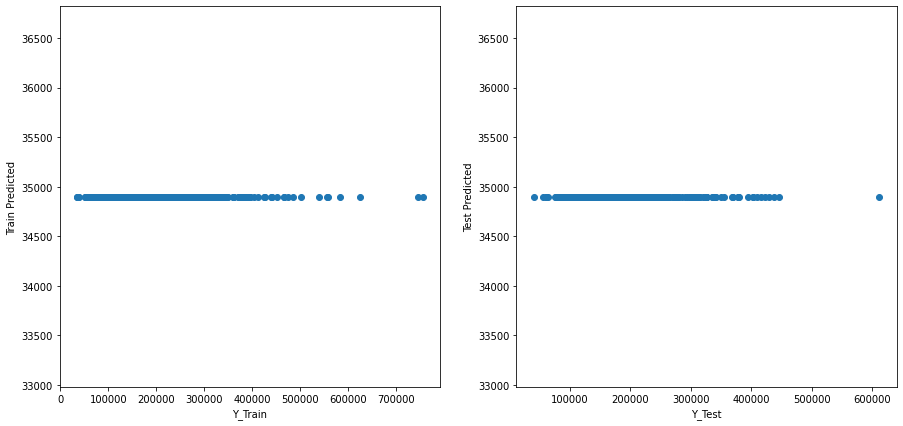

--- Train: Pred.val: 34900  Orig.val: 132500
--- Test: Pred.val: 34900  Orig.val: 177000
MSE Train: 166240.95565738494  MSE Test: 166169.98824595884 
Score Train: 0.0009784735812133072  Score Test: 0.0


(166240.95565738494, 166169.98824595884, 0.0, 0.0009784735812133072)

In [57]:
mse_score(classifier, None, X_train_ensemble, X_test_ensemble, no_limits=True)

In [58]:
classifier.predict(X_train_ensemble)


array([34900, 34900, 34900, ..., 34900, 34900, 34900])

### If stack has LinearClassifier, the result is a one value

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (463) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (471) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) do

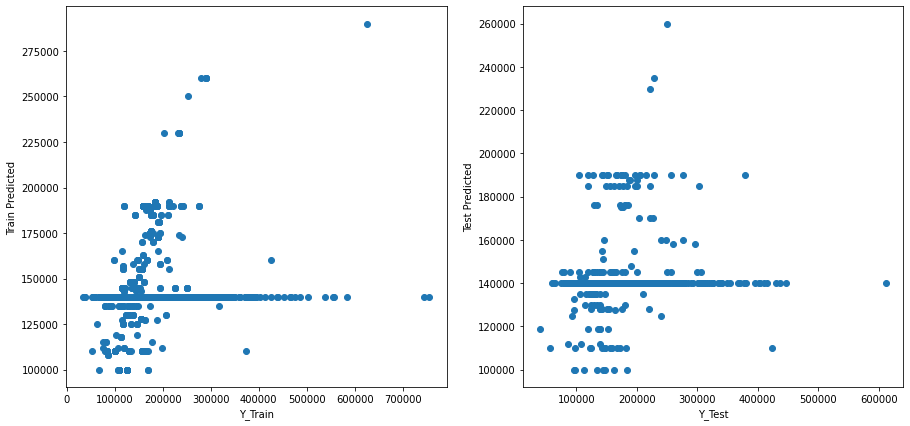

--- Train: Pred.val: 148000  Orig.val: 132500
--- Test: Pred.val: 140000  Orig.val: 177000
MSE Train: 87400.97282858791  MSE Test: 84903.86044146057 
Score Train: 0.012720156555772993  Score Test: 0.00684931506849315


(87400.97282858791,
 84903.86044146057,
 0.00684931506849315,
 0.012720156555772993)

In [59]:
classifier_no_linear = StackingClassifier(
    [
        ('RF', RandomForestClassifier()),
        ('LogR', LogisticRegression(max_iter=1e8)),
        ('DTC', DecisionTreeClassifier()),
    ],
LogisticRegression())
classifier_no_linear.fit(X_train_ensemble, y_train)
mse_score(classifier_no_linear, None, X_train_ensemble, X_test_ensemble, no_limits=True)